# Nucleation model

\begin{align}
\frac{d[E]}{dt} &= k_N [WA]^2 [E] - k_C [E] \\
\frac{d[WA]}{dt} &= k_A ([WA]_{max} - [WA]) - k_N [WA]^2[E] - k_P [WA][E]
\end{align}

At steady state:

\begin{align}
0 &= k_N [WA]_{eq}^2 [E]_{eq} - k_C [E]_{eq} \\
0 &= k_A ([WA]_{max} - [WA]_{eq}) - k_N [WA]_{eq}^2 [E]_{eq} - k_P [WA]_{eq} [E]_{eq}
\end{align}

Combining:

\begin{align}
0 &= k_A ([WA]_{max} - [WA]_{eq}) - k_C [E]_{eq} - k_P [WA]_{eq} [E]_{eq} \\
[E]_{eq} &= \frac{k_A ([WA]_{max} - [WA]_{eq})}{k_C + k_P [WA]_{eq}}
\end{align}

Knowing that at steady state $[WA]_{eq} = \sqrt{\frac{k_C}{k_N}}$:

\begin{align}
k_N [WA]_{eq}^2 [E]_{eq} &= k_C \frac{k_A ([WA]_{max} - \sqrt{\frac{k_C}{k_N}})}{k_C + k_P \sqrt{\frac{k_C}{k_N}}}
\end{align}

The model predicts that that the concentration of NPFs must be greater than the square root of the ratio of capping protein and Arp2/3 complex concentrations.

## Force dependence

If we model polymerization and capping like so:

\begin{align}
k_P (F) &= k_P \exp{(-F \delta / K_B T)} \\
k_C (F) &= k_C \exp{(-F \delta / K_B T)}
\end{align}

We use the same $\delta$ for polymerization and capping rate expressions because actin monomers and capping protein heterodimers have similar dimensions. $K_B$ is Boltzmann's constant and $T$ the temperature in Kelvin ($K_B T = 4.114 \mathrm{pN \cdot nm}$). Thus:

\begin{align}
k_N [WA]_{eq}^2 [E]_{eq} &= k_C \frac{k_A ([WA]_{max} - \sqrt{\frac{k_C \exp{(-F \delta / K_B T)}}{k_N}})}{k_C + k_P \sqrt{\frac{k_C \exp {(-F \delta / K_B T)}}{k_N}}}
\end{align}

In [1]:
from math import sqrt, exp
def nucleationmodel(loadRate, polRate, branchRate, capRate, noSites, force):
    nucleationRate = capRate * loadRate * (noSites - sqrt(capRate * exp(-force * 2.7 / 4.114)/ branchRate)) / (capRate + polRate * sqrt(capRate * exp(-force * 2.7 / 4.114) / branchRate))
    return nucleationRate

/home/jiongyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'Nucleation rate ($\\mathrm{\\mu M s^{-1}}$)')

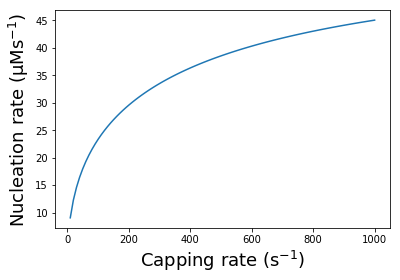

In [2]:
from numpy import array, zeros, linspace
from matplotlib.pyplot import plot, xlabel, ylabel
%matplotlib inline

noPoints = 100
nucleationRateArr = zeros(noPoints)
capRateArr = linspace(0.0, 1000.0, noPoints)
loadRate = 1.0
polRate = 100.0
branchRate = 10.0
noSites = 100

for i in range(noPoints):
    nucleationRateArr[i] = nucleationmodel(loadRate, polRate, branchRate, capRateArr[i], noSites, 0.0)
    
plot(capRateArr, nucleationRateArr)
xlabel(r"Capping rate ($\mathrm{s}^{-1}$)", fontsize = 18)
ylabel(r"Nucleation rate ($\mathrm{\mu M s^{-1}}$)", fontsize = 18)

/home/jiongyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'Nucleation rate ($\\mathrm{\\mu M s^{-1}}$)')

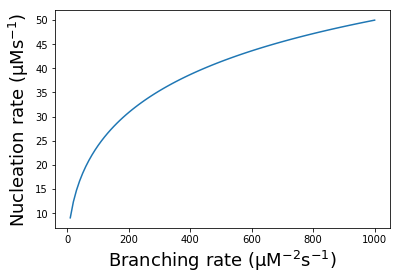

In [3]:
branchRateArr = linspace(0.0, 1000.0, noPoints)

for i in range(noPoints):
    nucleationRateArr[i] = nucleationmodel(loadRate, polRate, branchRateArr[i], 10.0, noSites, 0.0)
    
plot(branchRateArr, nucleationRateArr)
xlabel(r"Branching rate ($\mathrm{\mu M^{-2} s^{-1}}$)", fontsize = 18)
ylabel(r"Nucleation rate ($\mathrm{\mu M s^{-1}}$)", fontsize = 18)

Text(0,0.5,'Nucleation rate ($\\mathrm{\\mu M s^{-1}}$)')

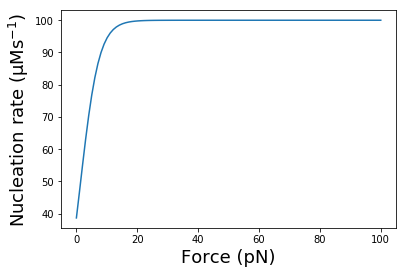

In [4]:
forceArr = linspace(0.0, 100.0, noPoints)

for i in range(noPoints):
    nucleationRateArr[i] = nucleationmodel(loadRate, polRate, 400.0, 10.0, noSites, forceArr[i])
    
plot(forceArr, nucleationRateArr)
xlabel(r"Force (pN)", fontsize = 18)
ylabel(r"Nucleation rate ($\mathrm{\mu M s^{-1}}$)", fontsize = 18)